# Data Analysis

In [99]:
import pandas as pd
import pandas_profiling
import numpy as np
import jieba
import jieba.posseg as pseg
from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib 
import nltk
import seaborn 
import sklearn
import gensim
import pyLDAvis
import wordcloud
import textblob
import spacy
import textstat

# First look at the data

In [15]:
train = pd.read_csv('nlp_train.csv')
train.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [16]:
val = pd.read_csv('nlp_valid.csv')
val.head()

,id,premise,hypothesis,lang_abv,language,label
0,a7b0b9498c,"It's just the beginning!""",A great journey is about to begin!,en,English,1
1,00c0cdf348,Lạnh hơn và xa hơn bao giờ hết đã phát triển t...,Giọng của Chúa cảm thấy thật xa xôi và lạnh lẽo,vi,Vietnamese,0
2,a2a8b36437,"Κατά συνέπεια, οι κυβερνητικοί υπεύθυνοι λήψης...",Οι κυβερνητικοί εκπρόσωποι αρνούνται να αλλάξο...,el,Greek,2
3,097b4dfe2a,You have to walk through it).,You need to pass through it on foot.,en,English,0
4,aab0894630,"Rather, kids today are not only little bundles...",While kids today are symbols of success and st...,en,English,1


In [17]:
test = pd.read_csv('test.csv')
test.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


# Shape of the data

In [19]:
#shape data
print("train shape: ", (train.shape))
print("validation shape: ", (val.shape))
print("test shape: ", (test.shape))

train shape:  (10908, 6)
validation shape:  (1212, 6)
test shape:  (5195, 5)


# Language Distribution in the data

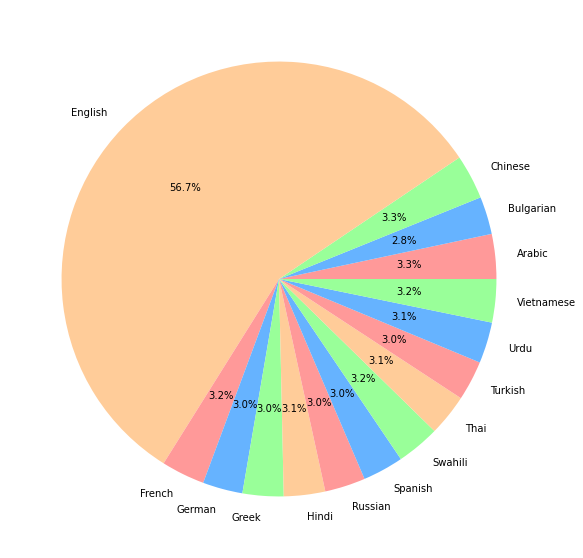

In [159]:
labels, frequencies = np.unique(train.language.values, return_counts = True)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%', colors=colors)
plt.show()

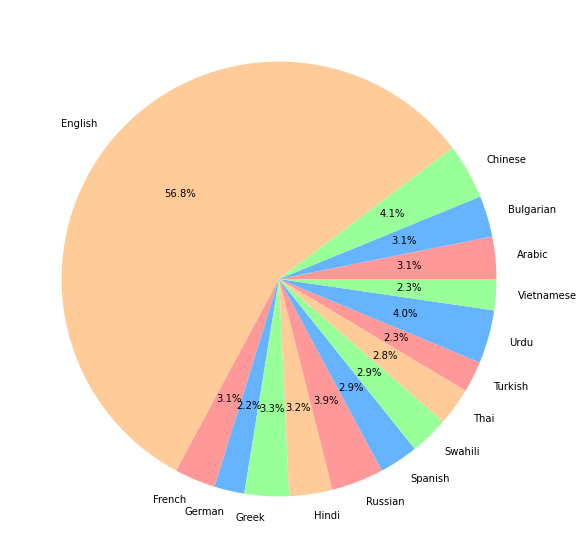

In [164]:
labels, frequencies = np.unique(val.language.values, return_counts = True)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%',colors=colors)
plt.show()

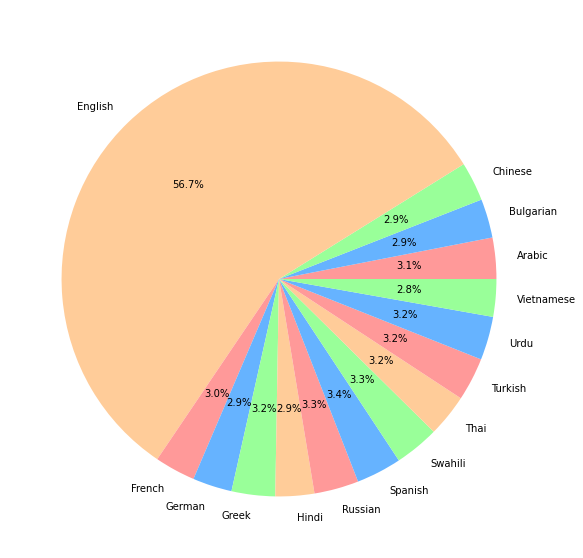

In [165]:
labels, frequencies = np.unique(test.language.values, return_counts = True)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%',colors=colors)
plt.show()

# Label Distribution in the data

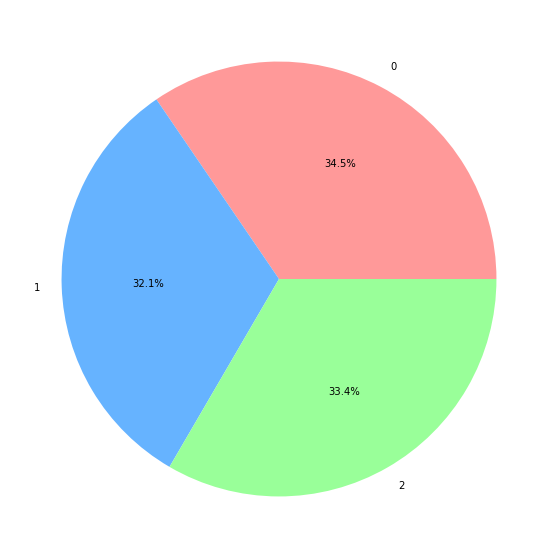

In [167]:
labels, frequencies = np.unique(train.label.values, return_counts = True)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%', colors=colors)
plt.show()

# Discovery: There is non hanzi scripture in the chinese texts 

In [21]:
for x in range(0,len(test['premise'])):
    if test['language'][x] == "Chinese":
        print(test["premise"][x])
        print(x)

与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp
3
哈拉德提供了第二个版本，即三个人一起前往卡拉奇。
36
我知道每个人，我的意思是每个人都很忙，很担心，有很多问题，人们不只是坐下来，你知道的，不只是聊天，并知道一切都会好起来。
73
在第一次拒绝Hazmi的贷款申请后，管理员同意允许他通过管理员的银行账户来获得$5,000电汇汇款。
77
1847年，一场名为“种姓战争”的野蛮起义见证了玛雅叛军屠杀白种侨民并控制了近三分之二的半岛。
95
是的有一种说法叫，有个住的地方，我不知道。
109
警方宣布，他们排除了琼贝妮特·拉姆齐哥哥和姐姐的犯罪嫌疑，因为案发时，这两人都不在这个城市。
113
国家意识也是如此。
167
她一直用闪亮的眼睛看着他，但看到他沮丧的面容，眉头深深的皱纹，她自己的表情变了。
239
15名劫机者中，除了2名外，其他人都被接纳为游客在美国逗留6个月（除了米达尔获得四个月的情况）。
357
你可能是对的，也可能是错的。
502
de Kooning已经93岁了，他现在既不是艺术家，也不是频道冲浪者。
599
她皱眉蹙额。
623
The Stampede这部作品原来是打算展示把大草原上的牛群赶到一起的高超技能和兴奋感。
655
但是法学院之间抢夺聪明学生的竞争也很激烈
667
运河摩托艇BV公司在这个城市有两个办事处。
733
混乱政权与有序政权形成鲜明对比。
833
感谢您在1999年支持印第安纳波利斯艺术博物馆。
849
正如我们后面将要看到的，eVect可以使生物圈最大化其自身维度的平均持续增长。
884
我的祖母出生于1910年，那时她还是一个小女孩。
892
当我在瑞士从事第一份工作时，我有一位不懂法文和英文的秘书，所以我必须亲自用这些语言写信以便她输入到电脑里。
979
她是个浅肤色的黑人。
1036
运营商没有得到有关无法进行屋顶救援的任何信息，因此不能建议来电者他们基本上已被排除。
1064
所以我只需要拿出总数，然后尝试像这样去解决。
1083
其中一些可能是由囚犯创造的，因为这些囚犯词汇量太小，难以理解已命名的概念、事件和情境。
1115
她姐姐的丈夫肤色也浅。
1137
佩德罗占据了王位，尽管武装斗争持续了好几个月，但之后仍然持续了很久的是痛苦煎熬。
1222
是的，但我不认为我们会这么做，因为你无法得到

# Compare Sentence length in Hypothesis and Premise 

In [138]:
#Count tokens in sentences in test set
token_test = test.assign(premise=np.nan, hypothesis=np.nan)
for x in range(0,len(test['premise'])):
    token_test["premise"][x] = len(test['premise'][x].split())
    token_test["hypothesis"][x] = len(test['hypothesis'][x].split())

/var/folders/dd/x8n0qs9n03gbj1k8q6l5ww8w0000gn/T/ipykernel_9954/562932888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_test["premise"][x] = len(test['premise'][x].split())
/var/folders/dd/x8n0qs9n03gbj1k8q6l5ww8w0000gn/T/ipykernel_9954/562932888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_test["hypothesis"][x] = len(test['hypothesis'][x].split())


In [139]:
#Count tokens in sentences in train set
token_train = train.assign(premise=np.nan, hypothesis=np.nan)
for x in range(0,len(train['premise'])):
    token_train["premise"][x] = len(train['premise'][x].split())
    token_train["hypothesis"][x] = len(train['hypothesis'][x].split())

/var/folders/dd/x8n0qs9n03gbj1k8q6l5ww8w0000gn/T/ipykernel_9954/124790408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_train["premise"][x] = len(train['premise'][x].split())
/var/folders/dd/x8n0qs9n03gbj1k8q6l5ww8w0000gn/T/ipykernel_9954/124790408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_train["hypothesis"][x] = len(train['hypothesis'][x].split())


In [141]:
#Count tokens in sentences in validation set
token_val = val.assign(premise=np.nan, hypothesis=np.nan)
for x in range(0,len(val['premise'])):
    token_val["premise"][x] = len(val['premise'][x].split())
    token_val["hypothesis"][x] = len(val['hypothesis'][x].split())

/var/folders/dd/x8n0qs9n03gbj1k8q6l5ww8w0000gn/T/ipykernel_9954/3135261997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_val["premise"][x] = len(val['premise'][x].split())
/var/folders/dd/x8n0qs9n03gbj1k8q6l5ww8w0000gn/T/ipykernel_9954/3135261997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_val["hypothesis"][x] = len(val['hypothesis'][x].split())


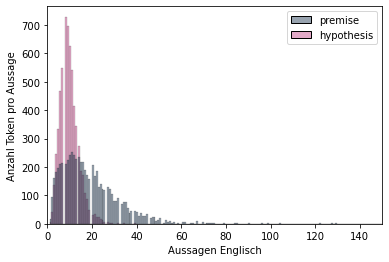

In [142]:
#create plot that comapres length of the sequences
# in train and test data for all lengths
fig, ax = plt.subplots()
sns.histplot(token_train_en.drop(columns=["label"]), ax=ax)  
colors = ["#334860", "#c65490"]
sns.set_palette(sns.color_palette(colors))
ax.set_xlim(0,150)
ax.set_ylabel("Anzahl Token pro Aussage")
ax.set_xlabel("Aussagen Englisch")

plt.show()

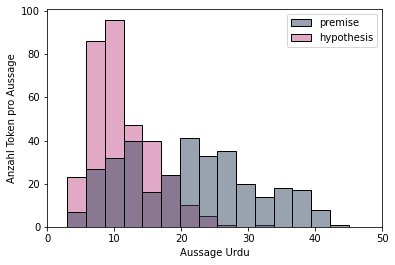

In [143]:
token_train_ur = token_train.loc[token_train['language'] == 'Urdu']
#create plot that comapres length of the proteinsequences
# in train and test data for all lengths
fig, ax = plt.subplots()
sns.histplot(token_train_ur.drop(columns=["label"]), ax=ax)  
colors = ["#334860", "#c65490"]
sns.set_palette(sns.color_palette(colors))
ax.set_xlim(0,50)
ax.set_ylabel("Anzahl Token pro Aussage")
ax.set_xlabel("Aussage Urdu")

plt.show()

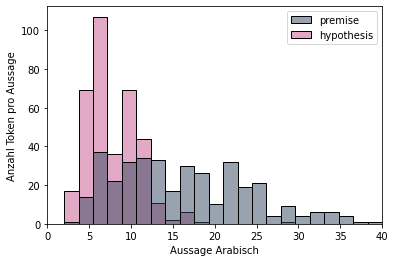

In [144]:
token_train_ur = token_train.loc[token_train['language'] == 'Arabic']
#create plot that comapres length of the proteinsequences
# in train and test data for all lengths
fig, ax = plt.subplots()
sns.histplot(token_train_ur.drop(columns=["label"]), ax=ax)  
colors = ["#334860", "#c65490"]
sns.set_palette(sns.color_palette(colors))
ax.set_xlim(0,40)
ax.set_ylabel("Anzahl Token pro Aussage")
ax.set_xlabel("Aussage Arabisch")

plt.show()

In [30]:
token_train_en = token_train.loc[token_train['language'] == 'English']

In [31]:
token_train_en 

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,10.0,14.0,en,English,0
1,5b72532a0b,15.0,10.0,en,English,2
3,5622f0c60b,17.0,8.0,en,English,0
7,fdcd1bd867,7.0,7.0,en,English,2
8,7cfb3d272c,16.0,11.0,en,English,1
...,...,...,...,...,...,...
10903,2b78e2a914,35.0,10.0,en,English,2
10904,7e9943d152,25.0,16.0,en,English,0
10905,5085923e6c,14.0,7.0,en,English,2
10906,fc8e2fd1fe,13.0,9.0,en,English,2


# Number of characters present in each sentence

In [39]:
train_en = train.loc[train['language'] == 'English']

## English hypothesis and premise

<AxesSubplot:>

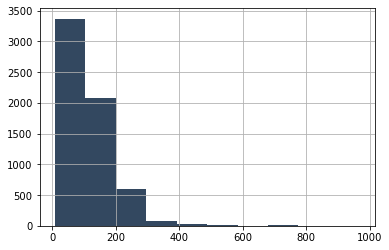

In [40]:
train_en['premise'].str.len().hist()

<AxesSubplot:>

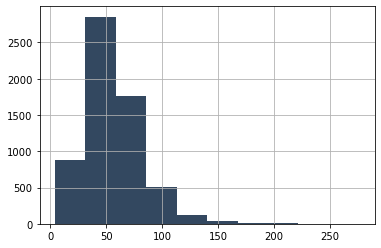

In [43]:
train_en['hypothesis'].str.len().hist()

## All languages hypothesis and premise

<AxesSubplot:>

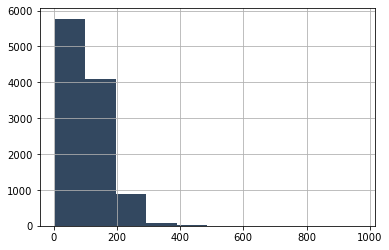

In [41]:
train['premise'].str.len().hist()

<AxesSubplot:>

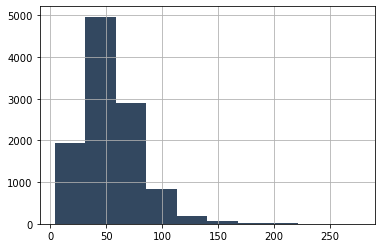

In [38]:
train['hypothesis'].str.len().hist()

# Tokens count

In [49]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
#x = amount of occurence
#y=amount of tokens in sentence

## English hypothesis and premise

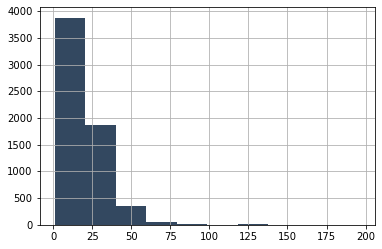

In [50]:
plot_word_number_histogram(train_en['premise'])

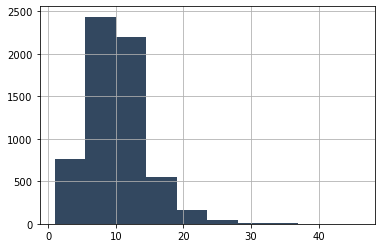

In [51]:
#x = amount of occurence
#y=amount of tokens in sentence
    
plot_word_number_histogram(train_en['hypothesis'])

## All languages hypothesis and premise

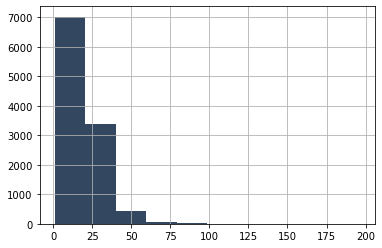

In [52]:
plot_word_number_histogram(train['premise'])

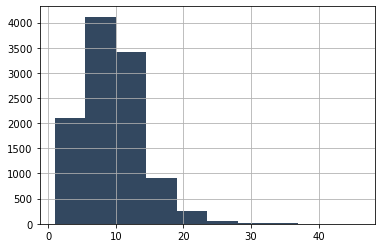

In [53]:

plot_word_number_histogram(train['hypothesis'])

# Average Word length

In [54]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

## English hypothesis and premise

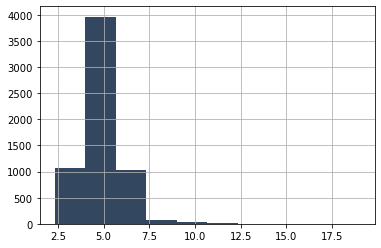

In [55]:
plot_word_length_histogram(train_en['premise'])

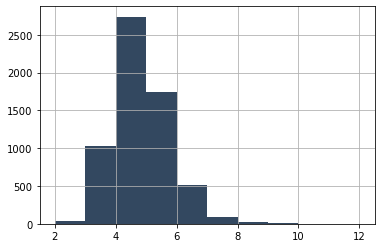

In [56]:
plot_word_length_histogram(train_en['hypothesis'])

## All languages hypothesis and premise

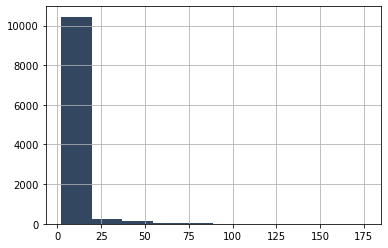

In [57]:
plot_word_length_histogram(train['premise'])

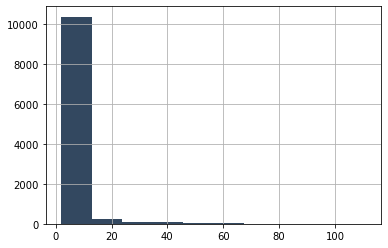

In [58]:
plot_word_length_histogram(train['hypothesis'])

# Statistic for frequently used Stopwords (English only)

In [73]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashagrutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
stop = set(stopwords.words('english'))

In [76]:
corpus=[]
new= train_en['hypothesis'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

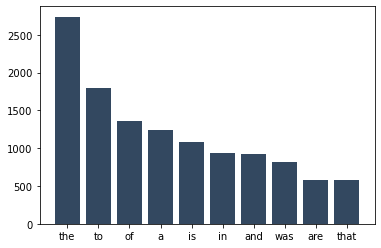

In [85]:
plot_top_stopwords_barchart(train_en['hypothesis'])

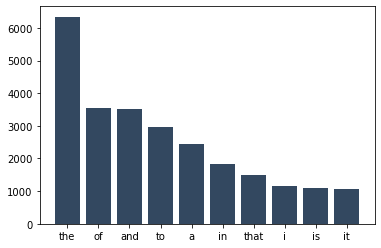

In [86]:
plot_top_stopwords_barchart(train_en['premise'])

# Statistic for frequently used words (English only)

In [79]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

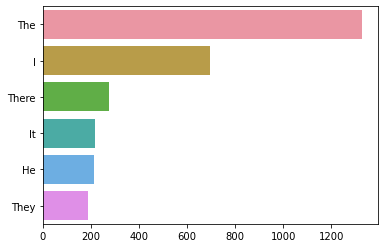

In [83]:
plot_top_non_stopwords_barchart(train_en['hypothesis'])

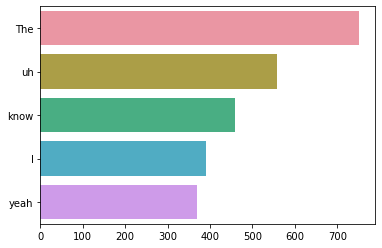

In [84]:
plot_top_non_stopwords_barchart(train_en['premise'])

# Statistic for frequently used words - all languages

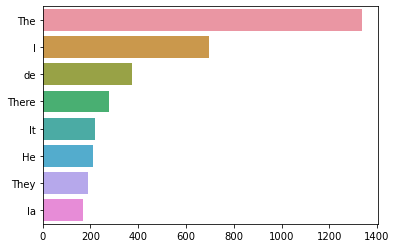

In [87]:
plot_top_non_stopwords_barchart(train['hypothesis'])

/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)


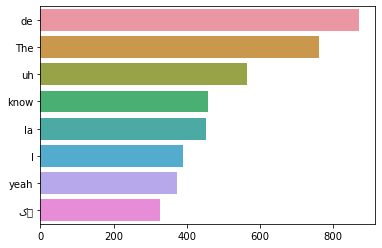

In [89]:
plot_top_non_stopwords_barchart(train['premise'])

# Most frequent n-grams

In [90]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

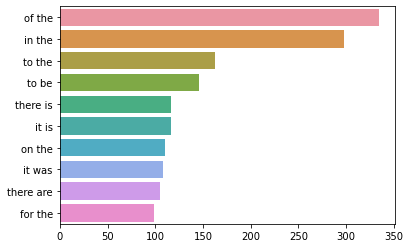

In [91]:
plot_top_ngrams_barchart(train_en['hypothesis'],2)

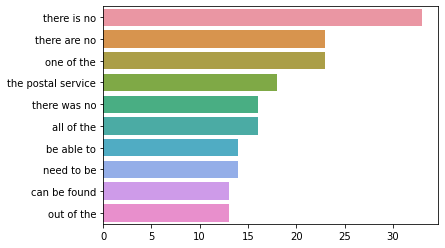

In [92]:
plot_top_ngrams_barchart(train_en['hypothesis'],3)

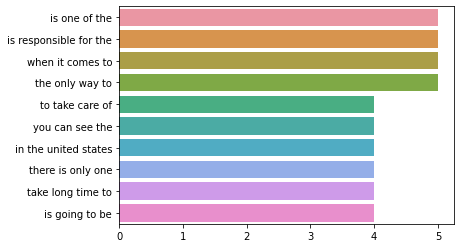

In [93]:
plot_top_ngrams_barchart(train_en['hypothesis'],4)

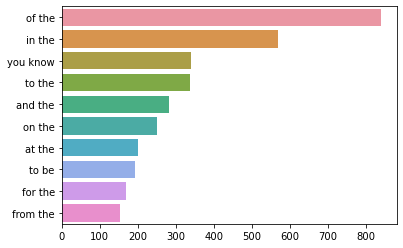

In [94]:
plot_top_ngrams_barchart(train_en['premise'],2)

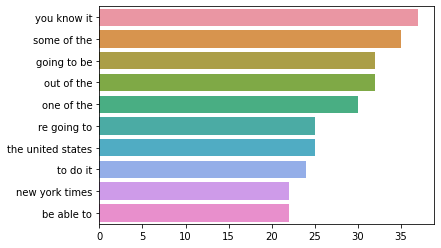

In [95]:
plot_top_ngrams_barchart(train_en['premise'],3)

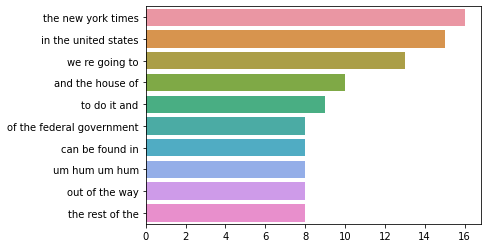

In [96]:
plot_top_ngrams_barchart(train_en['premise'],4)

# DOES NOT WORK Topic modeling exploration with pyLDAvis - English only

In [106]:
# Code Snippet for Creating LDA visualization

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [107]:
lda_model, bow_corpus, dic = get_lda_objects(train_en['premise'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashagrutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
plot_lda_vis(lda_model, bow_corpus, dic)

/Applications/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.117666  0.000337       1        1  29.562538
3     -0.099753  0.020384       2        1  29.388549
1      0.092395 -0.142931       3        1  21.311808
2      0.125024  0.122209       4        1  19.737106, topic_info=         Term        Freq       Total Category  logprob  loglift
22       yeah  323.000000  323.000000  Default  30.0000  30.0000
16       know  435.000000  435.000000  Default  29.0000  29.0000
18        n't  475.000000  475.000000  Default  28.0000  28.0000
17       like  269.000000  269.000000  Default  27.0000  27.0000
231     think  210.000000  210.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1353  million   19.766757   51.347788   Topic4  -6.4734   0.6680
699   control   18.171410   37.751508   Topic4  -6.5575   0.8915
581      This   20.157431   74.166182   Topic4  -6.4538   0.3199
483       two   19.620502  141.485771   Topic4  -6.4808  -0.3530
390      look   18.511346   58.798345   Topic4  -6.5390   0.4669

[322 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1087      1  0.419811   'll
1087      2  0.522431   'll
1087      3  0.055975   'll
29        1  0.736055   're
29        2  0.257619   're
...     ...       ...   ...
22        3  0.009274  yeah
232       1  0.181274  year
232       2  0.408920  year
232       3  0.261372  year
232       4  0.143333  year

[548 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [110]:
lda_model.show_topics()

[(0,
  '0.013*"yeah" + 0.012*"know" + 0.010*"like" + 0.010*"n\'t" + 0.007*"\'re" + 0.007*"think" + 0.007*"well" + 0.006*"would" + 0.006*"mean" + 0.005*"one"'),
 (1,
  '0.012*"The" + 0.005*"year" + 0.003*"program" + 0.003*"rule" + 0.003*"said" + 0.003*"see" + 0.003*"benefit" + 0.003*"government" + 0.002*"make" + 0.002*"two"'),
 (2,
  '0.007*"The" + 0.006*"one" + 0.004*"agency" + 0.003*"would" + 0.003*"But" + 0.003*"There" + 0.003*"also" + 0.003*"said" + 0.003*"must" + 0.003*"year"'),
 (3,
  '0.015*"The" + 0.013*"n\'t" + 0.010*"know" + 0.006*"well" + 0.006*"time" + 0.005*"year" + 0.005*"\'ve" + 0.005*"right" + 0.004*"think" + 0.004*"yeah"')]

In [114]:
plot_lda_vis(lda_model, bow_corpus, dic)

/Applications/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.117666  0.000337       1        1  29.555360
3     -0.099753  0.020384       2        1  29.397877
1      0.092395 -0.142931       3        1  21.312005
2      0.125024  0.122209       4        1  19.734758, topic_info=         Term        Freq       Total Category  logprob  loglift
22       yeah  323.000000  323.000000  Default  30.0000  30.0000
16       know  435.000000  435.000000  Default  29.0000  29.0000
18        n't  475.000000  475.000000  Default  28.0000  28.0000
17       like  269.000000  269.000000  Default  27.0000  27.0000
231     think  210.000000  210.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1353  million   19.764406   51.341904   Topic4  -6.4734   0.6682
699   control   18.169249   37.750758   Topic4  -6.5575   0.8915
581      This   20.155033   74.160883   Topic4  -6.4538   0.3200
483       two   19.618168  141.473834   Topic4  -6.4808  -0.3529
390      look   18.509144   58.791237   Topic4  -6.5390   0.4671

[322 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1087      1  0.419784   'll
1087      2  0.522398   'll
1087      3  0.055971   'll
29        1  0.736127   're
29        2  0.257644   're
...     ...       ...   ...
22        3  0.009275  yeah
232       1  0.181261  year
232       2  0.408891  year
232       3  0.261353  year
232       4  0.143322  year

[548 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

* On the left side, the area of each circle represents the importance of the topic relative to the corpus. As there are four topics, we have four circles.
* The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 3 and topic 4 overlap, this indicates that the topics are more similar.
* On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 1 the most relevant words are police, new, may, war, etc

# Word cloud English

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashagrutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


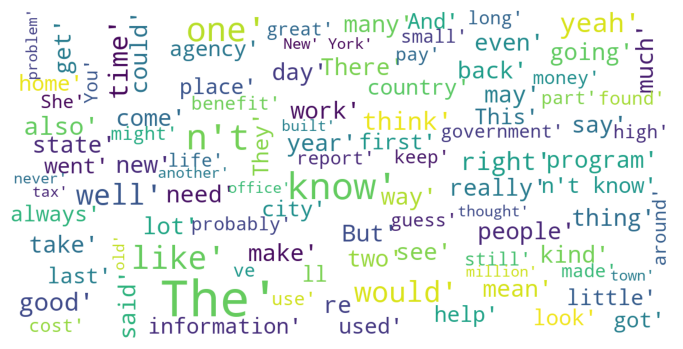

In [125]:
plot_wordcloud(train_en['premise'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashagrutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


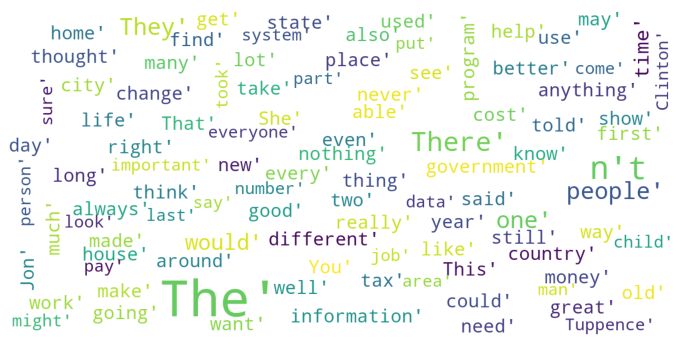

In [126]:
plot_wordcloud(train_en['hypothesis'])

# Testing something

In [137]:
train_en = train.loc[train['language'] == 'English']
test_en = test.loc[test['language'] == 'English']
val_en = val.loc[val['language'] == 'English']


#Count tokens in sentences in test set
token_test = test_en.assign(premise=np.nan, hypothesis=np.nan)
for x in range(0,len(test_en['premise'])):
    token_test["premise"][x] = len(test_en['premise'][x].split())
    token_test["hypothesis"][x] = len(test_en['hypothesis'][x].split())
"""
#Count tokens in sentences in train set
token_train = train.assign(premise=np.nan, hypothesis=np.nan)
for x in range(0,len(train['premise'])):
    token_train["premise"][x] = len(train_en['premise'][x].split())
    token_train["hypothesis"][x] = len(train_en['hypothesis'][x].split())

#Count tokens in sentences in validation set
token_val = val.assign(premise=np.nan, hypothesis=np.nan)
for x in range(0,len(val['premise'])):
    token_val["premise"][x] = len(val_en['premise'][x].split())
    token_val["hypothesis"][x] = len(val_en['hypothesis'][x].split())
    
"""

KeyError: 0